In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D,GlobalAveragePooling2D, MaxPool2D,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
from google.colab.patches import cv2_imshow
from numpy.core.fromnumeric import size
import cv2
import itertools
import os
import shutil
import random
import glob as gb
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
testpath='/content/drive/MyDrive/Yemeni_coins2/test1'
trainpath='/content/drive/MyDrive/Yemeni_coins2/train1'
validpath='/content/drive/MyDrive/Yemeni_coins2/valid1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(
    directory=trainpath, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(
    directory=validpath, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input).flow_from_directory(
    directory=testpath, target_size=(224,224), batch_size=10, shuffle=False)

Found 6036 images belonging to 6 classes.
Found 2009 images belonging to 6 classes.
Found 2016 images belonging to 6 classes.


In [ ]:
eff = tf.keras.applications.EfficientNetV2B3(include_top=False)
x=eff.output
x=GlobalAveragePooling2D()(x)
output = Dense(units=6, activation='softmax')(x)
model = Model(inputs=eff.input, outputs=output)

52617216/52606240 [==============================] - 0s 0us/step


In [ ]:
len(model.layers)

385

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                            

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=20,
          verbose=1
)

Epoch 1/20
604/604 [==============================] - 1571s 3s/step - loss: 0.3226 - accuracy: 0.8945 - val_loss: 0.0353 - val_accuracy: 0.9905
Epoch 2/20
604/604 [==============================] - 210s 348ms/step - loss: 0.0323 - accuracy: 0.9929 - val_loss: 0.0125 - val_accuracy: 0.9970
Epoch 3/20
604/604 [==============================] - 209s 347ms/step - loss: 0.0213 - accuracy: 0.9949 - val_loss: 0.0152 - val_accuracy: 0.9950
Epoch 4/20
604/604 [==============================] - 212s 351ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0215 - val_accuracy: 0.9950
Epoch 5/20
604/604 [==============================] - 213s 353ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.0101 - val_accuracy: 0.9980
Epoch 6/20
604/604 [==============================] - 210s 347ms/step - loss: 0.0123 - accuracy: 0.9955 - val_loss: 0.0065 - val_accuracy: 0.9995
Epoch 7/20
604/604 [==============================] - 210s 348ms/step - loss: 0.0081 - accuracy: 0.9977 - val_loss: 0.0122 - v

In [ ]:
np.save('/content/drive/MyDrive/Yemeni_coins2/Model/history_eff5.npy',history.history)

model.save('/content/drive/MyDrive/Yemeni_coins2/Model/eff5.h5')
print('save')

save


In [ ]:
history=np.load('/content/drive/MyDrive/Yemeni_coins2/Model/history_eff5.npy',allow_pickle='TRUE').item()

In [ ]:
model=load_model('/content/drive/MyDrive/Yemeni_coins2/Model/eff5.h5')

In [ ]:
x,y=model.evaluate(test_batches)
print('loss is ',x*100)
print('Accuracy is ',y*100)

202/202 [==============================] - 464s 2s/step - loss: 0.0084 - accuracy: 0.9970
loss is  0.841935258358717
Accuracy is  99.70238208770752


Visualizing the Loss and Accuracy

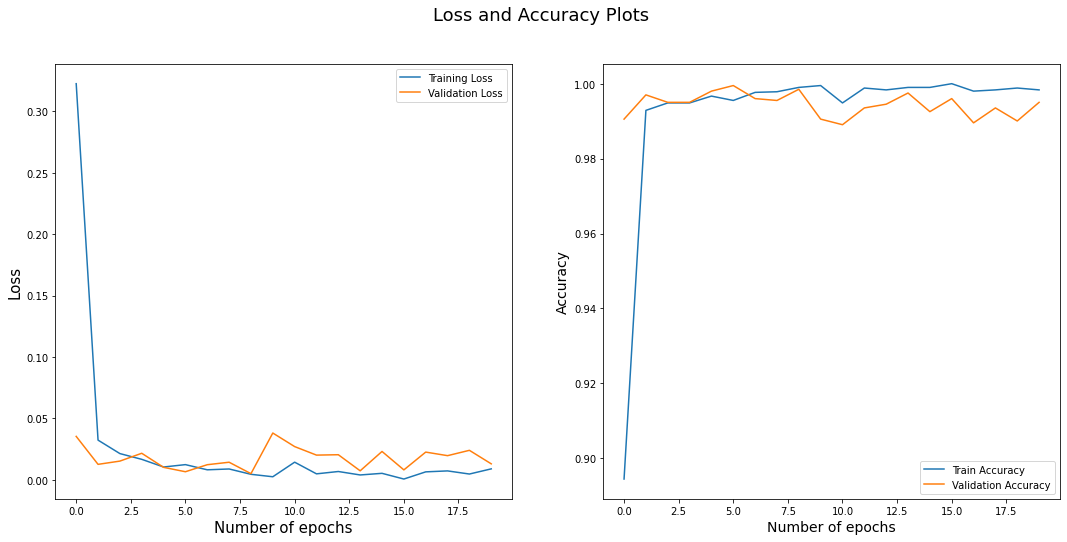

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))
plt.suptitle('Loss and Accuracy Plots', fontsize=18)
plt.subplot(1,2,1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.subplot(1,2,2)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
test_batches.class_indices

{'100': 0, '1000': 1, '200': 2, '250': 3, '50': 4, '500': 5}

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=predictions.argmax(axis=1))

In [ ]:
cm

In [ ]:
cm_plot_labels = ['100','1000','200','250','50','500']

Confusion matrix, without normalization
[[336   0   0   0   0   0]
 [  0 333   0   0   3   0]
 [  0   0 334   0   0   2]
 [  0   0   0 335   1   0]
 [  0   0   0   0 336   0]
 [  0   0   0   0   0 336]]


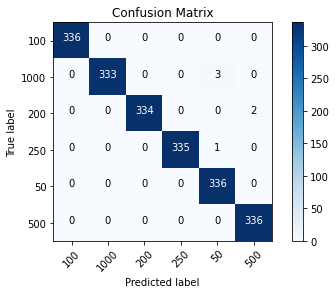

In [ ]:
cm_plot_labels = ['100','1000','200','250','50','500']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.efficientnet_v2.preprocess_input(img_array_expanded_dims)

In [ ]:
os.chdir('/content/drive/MyDrive/Yemeni_coins2/newtest')
files=gb.glob('*')
len(files)


93

In [ ]:
in_data=[]
os.chdir('/content/drive/MyDrive/Yemeni_coins2/newtest')
files=gb.glob('*')
for c in files:
  pre_imge=prepare_image(c)
  in_data.append(pre_imge)
in_data=np.array(in_data)

pre_data=[]
for c in in_data:
  predictions =model.predict(c)
  pre_data.append(np.argmax(predictions))
pre_data=np.array(pre_data)

i=0
count=0
for c in files:
  if cm_plot_labels[pre_data[i]]!=c.split('_')[0]:
    print(f'{c}---{cm_plot_labels[pre_data[i]]}------- {i}')
    count+=1
  i+=1
print(f'the error is {count} from {len(files)} images')


the error is 0 from 93 images
